In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from cycler import cycler
import matplotlib.pyplot as plt
import csv
import datetime

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("new.csv")

# Success - Display the first record
display(data.head(n=20))

wind_data = pd.read_csv("wind_13-16.csv")
display(wind_data.head(n=10))

,Date,Time,Area1 Amagansett,Area2-Bridgehampton&W/OHither Hills,Area3-Canal&W/OE.Hampton/Buell,Date New,Unnamed: 6,Unnamed: 7
0,1/1/13,0:00,8.0,13.0,51.9,1/1/13 0:00,NaN,NaN
1,1/1/13,1:00,8.0,13.0,51.9,1/1/13 2:00,NaN,NaN
2,1/1/13,2:00,7.5,12.4,48.9,1/1/13 2:00,NaN,NaN
3,1/1/13,3:00,7.3,11.5,46.0,1/1/13 3:00,NaN,NaN
4,1/1/13,4:00,7.2,10.8,44.3,1/1/13 4:00,NaN,NaN
5,1/1/13,5:00,7.2,10.8,45.4,1/1/13 5:00,NaN,NaN
6,1/1/13,6:00,7.0,11.0,46.5,1/1/13 6:00,NaN,NaN
7,1/1/13,7:00,7.1,11.3,47.4,1/1/13 7:00,NaN,NaN
8,1/1/13,8:00,7.2,11.5,48.3,1/1/13 8:00,NaN,NaN
9,1/1/13,9:00,7.7,11.4,49.1,1/1/13 9:00,NaN,NaN


,off.J1,off.K1,k - long island,Date New
0,0.024427,0.016909,NaN,1/1/13 0:00
1,0.039069,0.000755,NaN,1/1/13 1:00
2,0.059326,0.000000,NaN,1/1/13 2:00
3,0.100809,0.000000,NaN,1/1/13 3:00
4,0.145512,0.001054,NaN,1/1/13 4:00
5,0.139533,0.014471,NaN,1/1/13 5:00
6,0.169917,0.083355,NaN,1/1/13 6:00
7,0.192938,0.129404,NaN,1/1/13 7:00
8,0.169290,0.137835,NaN,1/1/13 8:00
9,0.122226,0.183954,NaN,1/1/13 9:00


In [8]:
X = data['Area1 Amagansett'][:n_hours]
Y = data['Area2-Bridgehampton&W/OHither Hills'][:n_hours]
Z = data['Area3-Canal&W/OE.Hampton/Buell'][:n_hours]

solar = wind_data['off.K1'][:n_hours]
load = []
for i in range(0,len(X)):
    load.append(X[i]+Y[i]+Z[i])
    

186.04237353
12005.9740027
2233619.9


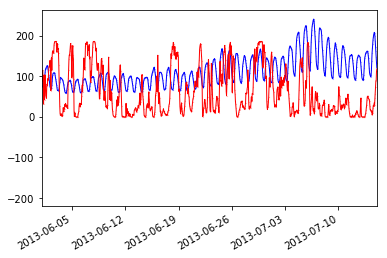

In [9]:
n_hours = 8760*3
print sum(load)/sum(solar)
print sum(solar)
print sum(load)
date = data['Date New']
fig, ax = plt.subplots()


ax.plot_date(date[:n_hours/3],load[:n_hours/3],markersize=.1,linewidth=1, linestyle="-", color ='b')
ax.plot_date(date[:n_hours/3],solar[:n_hours/3]*186.04,markersize=.1,linewidth=1, linestyle="-", color = 'r')
plt.gcf().autofmt_xdate()
ax.set_xlim([datetime.date(2013, 6, 1), datetime.date(2013, 7, 15)])

#plt.rcParams["figure.figsize"] = [20,9]

plt.show()

In [48]:
def sim(bat_cap, solar_cap, solar):
    solar_gen = []
    for item in solar:
        solar_gen.append(item*solar_cap)
    
    battery = 0
    battery_storage = []
   
    battery_used = []
    imprt = []
    exprt = []
    imp = 0
    exp = 0
    score = []
    cdc = 0 # to calculate total discharge and charing of battery
    length = [] # to store the KWh stored in battery for the length of time
    length_stored = []
    count = 0
    for i in range(0,n_hours):
         
        temp1 = battery                     # to store available power BEFORE each hour
            
        if load[i] >= (solar_gen[i] + battery):
            battery = battery - bat_cap*(5/13.5)
            if battery < 0:
                battery = 0
            temp2 = battery                 # to store available power AFTER each hour
            imp = load[i] - (solar_gen[i] + (temp1-temp2))
            imprt.append(imp)
            exprt.append(0)
            battery_used.append(temp1-temp2)
            
            score.append(0)
        
        elif load[i] >= (solar_gen[i]):
            reqd = load[i] - solar_gen[i]
            if reqd > bat_cap*(5/13.5):
                battery = battery - bat_cap*(5/13.5)
                temp2 = battery
                imp = load[i] - (solar_gen[i] + (temp1-temp2)) 
                imprt.append(imp)
                battery_used.append(temp1-temp2)
                score.append(0)
            else:
                battery = battery - reqd
                battery_used.append(reqd)
                score.append(1)
                exprt.append(0)
                imprt.append(0)
                
            

        elif load[i] < (solar_gen[i]):
            avlbl = min(bat_cap - battery, bat_cap*(5/13.5))  # avlbl = available storage
            battery_used.append(0)
            if solar_gen[i] - load[i] > avlbl:
                battery = battery + avlbl
                temp2 = battery
                exp = (solar_gen[i] - load[i] - (temp2-temp1))
                exprt.append(exp)
                imprt.append(0)
            else:
                battery = battery + solar_gen[i] - load[i]
                imprt.append(0)
                exprt.append(0)
            score.append(1)
        
        battery_storage.append(battery)
        
        
        if (temp1 - battery) <= 0:          #  battery storage increases
            for i in range(0, len(length)):
                length[i] = length[i] + 1
            for i in range(0,np.around(int(battery - temp1), decimals = 0)):
                length.append(1)
        if (temp1 - battery) > 0:        #  battery storage decreases
            for i in range(0,np.around(int(temp1 - battery), decimals = 0)):
                
                length_stored.append(length[0])
                del length[0]
            for i in range(0, len(length)):
                length[i] = length[i] + 1
                
        

        
        cdc = cdc + np.absolute(temp1-battery)
    
    fig, ax = plt.subplots()

    ax.plot_date(date[:n_hours/5],load[:n_hours/5],markersize=.1,linewidth=1, linestyle="-")
    ax.plot_date(date[:n_hours/5],solar_gen[:n_hours/5],markersize=.1,linewidth=1, linestyle="-", color = 'r')
    #ax.plot_date(date[:n_hours],battery_used[:n_hours],markersize=.1,linewidth=1, linestyle="-", color = 'k')
    ax.plot_date(date[:n_hours/5],battery_storage[:n_hours/5],markersize=.1,linewidth=1, linestyle="-", color = 'k')
    ax.plot_date(date[:n_hours/5],imprt[:n_hours/5],markersize=.1,linewidth=1, linestyle="-", color = 'm')
    #ax.plot_date(date[:n_hours],exprt[:n_hours],markersize=.1,linewidth=1, linestyle="-", color = 'g')
    

    plt.gcf().autofmt_xdate()

    ax.set_xlim([datetime.date(2013, 7, 1), datetime.date(2013, 7, 5)])
    ax.set_ylim([0,300])

    #plt.rcParams["figure.figsize"] = [20,9]

    #plt.show()
    
    #plt.hist(length_stored, bins = 150)
    
    plt.show()
    sc = np.mean(score)*100
    #print "Score: {}%".format(sc)
    #print "Total Discharge/Charge: {}MWh".format(cdc/1000)
    #print "Cycles: {}".format(cdc/bat_cap/2)  # 1 Cycle = charhing up the entire battery 1 time to its max potential and discharging to 0
    
    avg_usage = sum(load)/n_hours
    
    import_norm = (sum(imprt)/sum(load))
    export_norm = (sum(exprt)/sum(load))

    cycles = cdc/bat_cap/2/365/3
    
    length_stored_mean = np.mean(length_stored)
    print count
    return (battery_storage, imprt, exprt, battery_used, solar_gen, import_norm, export_norm, cycles, sc, length_stored_mean, length_stored)

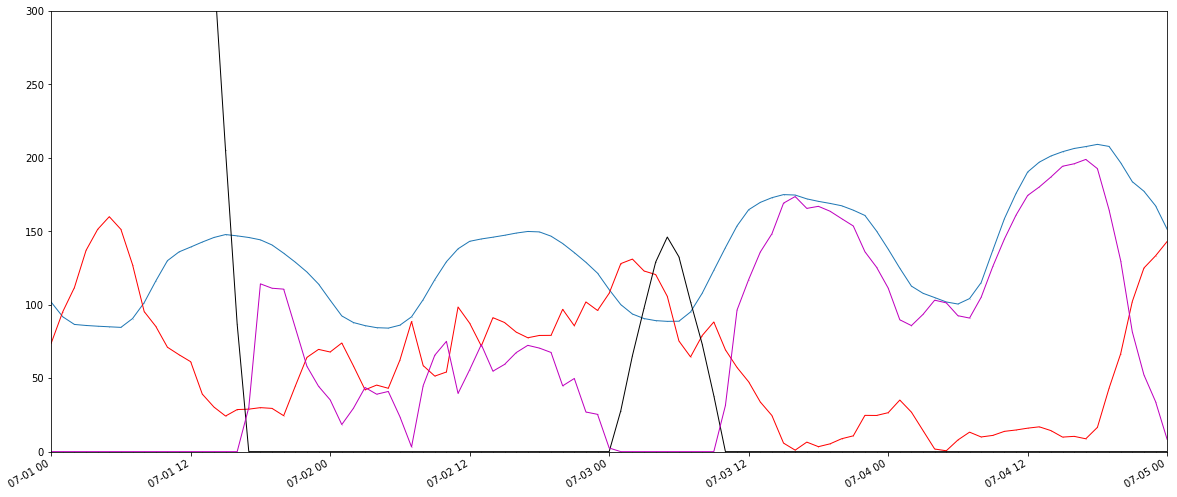

0


In [49]:
battery_storage, imprt, exprt, battery_used, solar_gen,import_norm, export_norm,x,y,z,l = sim(84.99*24, 186.04, solar)
#battery_storage, imprt1, exprt1, battery_used, solar_gen,import_norm, export_norm = sim(5000, 1026*1, solar)
#battery_storage, imprt2, exprt2, battery_used, solar_gen,import_norm, export_norm = sim(6000, 1026*1, solar)
#battery_storage, imprt3, exprt3, battery_used, solar_gen,import_norm, export_norm = sim(7000, 1026*1, solar)

In [18]:
print np.mean(l)
print max(battery_storage)/84.99
print max(imprt)
print max(load)

113.606150285
24.0
225.546161737
241.3


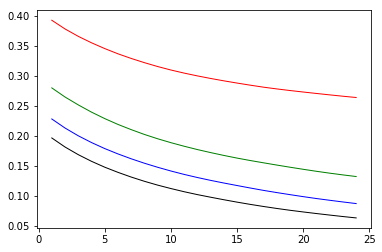

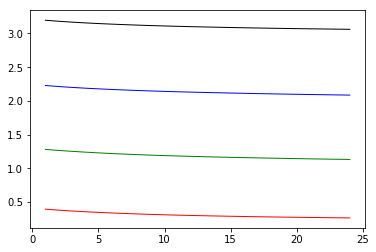

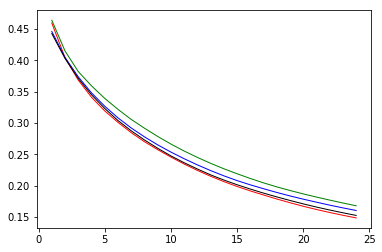

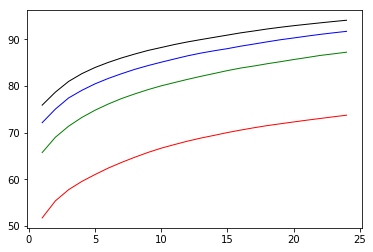

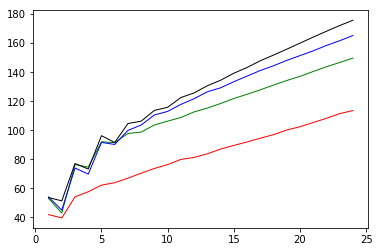

In [74]:
imprt_series = []
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
fig, ax3 = plt.subplots()
fig, ax4 = plt.subplots()
fig, ax5 = plt.subplots()

x = 25
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b','k'])))

battery_load_hours = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
for j in range(1,5):
    cycles_series_j = []
    import_series_j = []
    export_series_j = []
    sc_series_j = []
    ln_series_j = []
    for i in range(1,x):
        battery_storage, imprt, exprt, battery_used, solar_gen, import_norm_i_j, export_norm_i_j, cycles_i_j, sc_i_j, ln_i_j = sim(84.99*i, 186.04*j, solar)
        import_series_j.append(import_norm_i_j)
        export_series_j.append(export_norm_i_j)
        cycles_series_j.append(cycles_i_j)
        sc_series_j.append(sc_i_j)
        ln_series_j.append(ln_i_j)
    
    ax1.plot(battery_load_hours[:x-1], import_series_j,markersize=.1,linewidth=1, linestyle="-")
    ax2.plot(battery_load_hours[:x-1], export_series_j,markersize=.1,linewidth=1, linestyle="-")
    ax3.plot(battery_load_hours[:x-1], cycles_series_j,markersize=.1,linewidth=1, linestyle="-")
    ax4.plot(battery_load_hours[:x-1], sc_series_j,markersize=.1,linewidth=1, linestyle="-")
    ax5.plot(battery_load_hours[:x-1], ln_series_j,markersize=.1,linewidth=1, linestyle="-")

    

#plt.rcParams["figure.figsize"] = [20,9]

plt.show()

In [32]:
stand = []
for i in range(0,n_hours):
    j = i
    use = 0
    while battery_storage[i] > use:
        if j < n_hours:
            use = use + load[j]
            j = j+1
        else:
            break
    stand.append(j-i)

Mean standalone time: 16.2585996956 hours


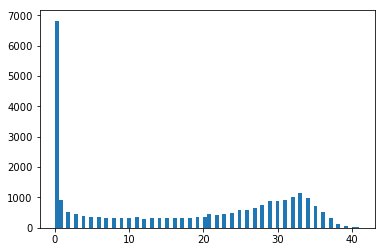

In [33]:
plt.hist(stand, bins = 80)

st = np.mean(stand)
print "Mean standalone time: {} hours".format(st)

In [114]:
temp1 = 60
battery = 40



if (temp1 - battery) <= 0:          #  battery storage increases
    for i in range(0, len(length)):
        length[i] = length[i] + 1
    for i in range(0,np.around(int(battery - temp1), decimals = 0)):
        length.append(1)
        
if (temp1 - battery) > 0:        #  battery storage decreases
    for i in range(0,np.around(int(temp1 - battery), decimals = 0)):
        if len(length) == 0:
            break
        length_stored.append(length[0])
        del length[0]
    for i in range(0, len(length)):
        length[i] = length[i] + 1

In [115]:
print length, length_stored

[] [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


ValueError: invalid literal for int() with base 10: 'x'